In [1]:
import os
import glob
import random
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
directory = "./inputs/PDB_monomers/pdbs/"

In [3]:
import os
import glob
from os.path import basename, exists
def pdb_to_fasta(directory):
    longer_names = {'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D',
                    'CYS': 'C', 'GLU': 'E', 'GLN': 'Q', 'GLY': 'G',
                    'HIS': 'H', 'ILE': 'I', 'LEU': 'L', 'LYS': 'K',
                    'MET': 'M', 'PHE': 'F', 'PRO': 'P', 'SER': 'S',
                    'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'}
    
    pdb_files = glob.glob(os.path.join(directory, '*.pdb'))
    sequences_length = {}
    for pdbname in tqdm(pdb_files):
        assert(exists(pdbname)), f"File {pdbname} does not exist"
        
        lines = open(pdbname, 'r').readlines()
        
        sequence = ''
        oldresnum = '   '
        
        for line in lines:
            if len(line) > 20:
                if line[0:3] == 'TER':
                    break
                elif (line[0:6] == 'HETATM') and (line[17:20] == 'MSE'):  # Selenomethionine
                    line = 'ATOM  ' + line[6:17] + 'MET' + line[20:]
                    if line[12:14] == 'SE':
                        line = line[0:12] + ' S' + line[14:]
                    if len(line) > 75 and line[76:78] == 'SE':
                        line = line[0:76] + ' S' + line[78:]
                
                if line[0:4] == 'ATOM':
                    resnum = line[23:26]
                    if resnum != oldresnum:
                        longname = line[17:20]
                        sequence += longer_names.get(longname, 'X')
                    oldresnum = resnum
        
        # print(f'>{basename(pdbname)}\n{sequence}\nLength: {len(sequence)}\n')
        sequences_length[basename(pdbname)[:-4]] = len(sequence)
        
    return sequences_length

In [4]:
seq2len = pdb_to_fasta("./inputs/PDB_monomers/pdbs/")

100%|██████████| 4476/4476 [00:15<00:00, 298.19it/s]


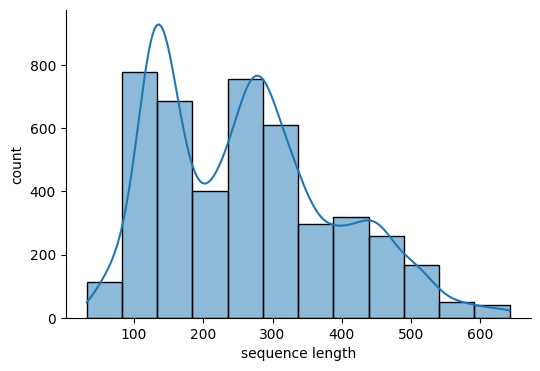

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(seq2len.values(), kde=True, stat='count', binwidth=50, ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('count')
ax.set_xlabel('sequence length')
ax.get_legend().remove()
plt.savefig("seqlen.pdf", format='pdf',bbox_inches='tight')
plt.show()

In [6]:
#"50-150", "150-250", "250-350", "350-450", "450-550", "550-650"

In [7]:
# Define the bins
bins = [(50, 150), (150, 250), (250, 350), (350, 450), (450, 550), (550, 650)]

# Create a dictionary to store the sampled file names for each bin
sampled_files = {bin_range: [] for bin_range in bins}

# Stratified sampling
for bin_range in bins:
    bin_files = [file for file, length in seq2len.items() if bin_range[0] <= length < bin_range[1]]
    if len(bin_files) >= 50:
        random.seed(10)
        sampled_files[bin_range] = random.sample(bin_files, 50)
    else:
        sampled_files[bin_range] = bin_files

In [8]:
for k in sampled_files.keys():
    print(len(sampled_files[k]))

50
50
50
50
50
50


In [11]:
# Write the sampled file names to a text file
with open('sampled_files.txt', 'w') as file:
    for files in sampled_files.values():
        file.write(",".join(files))
        file.write("\n")